In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Intro here

In [48]:
housing = pd.read_csv('data/data.csv')
housing.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [49]:
# Split into target and feature sets
y_housing = pd.DataFrame(housing['price'])
y_housing.columns = ['price']
X_housing = housing.drop('price', axis = 1)
y_housing.head()


,price
0,313000.0
1,2384000.0
2,342000.0
3,420000.0
4,550000.0


In [50]:
X_housing.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [51]:
# Cleaning date column
X_housing['date']= X_housing['date'].str[0:10]
X_housing.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [52]:
# All sampled houses are in the same country, making the country attribute unnecessary for analysis.
print(X_housing.country.unique())

X_housing.drop('country', axis = 1, inplace = True)
X_housing.head()

['USA']


,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
0,2014-05-02,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133
1,2014-05-02,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119
2,2014-05-02,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042
3,2014-05-02,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008
4,2014-05-02,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052


In [53]:
# Statezip can be split into state and zip columns, first I'll check which states the sampled houses were located in.
# I would expect the sampled houses to be located on based on comments from kaggle, but I'll check anyways.
# I'll grab split the zipcode out too for fun.
# Interestingly, different cities can have the same zip codes!

X_housing['stateziplist'] = X_housing['statezip'].str.split(' ')

L = []
count = 0
for value in list(X_housing['stateziplist']):
    L.append(value[0])
    X_housing.loc[count, 'zip'] = str(value[1])
    count+=1

print('Nope, all in WA:')
print(set(L),'\n\n')

X_housing.drop(['stateziplist','statezip'], axis = 1, inplace = True)
X_housing.head()

Nope, all in WA:
{'WA'} 




,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,zip
0,2014-05-02,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,98133
1,2014-05-02,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,98119
2,2014-05-02,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,98042
3,2014-05-02,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,98008
4,2014-05-02,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,98052


In [54]:
# I'll see if there are different dates too.

# Appears so.
L  = list(X_housing.date.unique())
print(f'{len(L)} unique dates')
print(L)

70 unique dates
['2014-05-02', '2014-05-03', '2014-05-04', '2014-05-05', '2014-05-06', '2014-05-07', '2014-05-08', '2014-05-09', '2014-05-10', '2014-05-11', '2014-05-12', '2014-05-13', '2014-05-14', '2014-05-15', '2014-05-16', '2014-05-17', '2014-05-18', '2014-05-19', '2014-05-20', '2014-05-21', '2014-05-22', '2014-05-23', '2014-05-24', '2014-05-25', '2014-05-26', '2014-05-27', '2014-05-28', '2014-05-29', '2014-05-30', '2014-05-31', '2014-06-01', '2014-06-02', '2014-06-03', '2014-06-04', '2014-06-05', '2014-06-06', '2014-06-07', '2014-06-08', '2014-06-09', '2014-06-10', '2014-06-11', '2014-06-12', '2014-06-13', '2014-06-14', '2014-06-15', '2014-06-16', '2014-06-17', '2014-06-18', '2014-06-19', '2014-06-20', '2014-06-21', '2014-06-22', '2014-06-23', '2014-06-24', '2014-06-25', '2014-06-26', '2014-06-27', '2014-06-28', '2014-06-29', '2014-06-30', '2014-07-01', '2014-07-02', '2014-07-03', '2014-07-04', '2014-07-05', '2014-07-06', '2014-07-07', '2014-07-08', '2014-07-09', '2014-07-10']


In [55]:
##### The years are all the same, so I'll drop those too.
# Might as well split out month and day as well

count = 0
for date_string in list(X_housing['date']):
    X_housing.loc[count, 'month'] = date_string[5:7]
    X_housing.loc[count, 'day'] = date_string[8:10]
    count+=1

X_housing.drop('date', inplace = True, axis = 1)
X_housing.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,zip,month,day
0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,98133,05,02
1,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,98119,05,02
2,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,98042,05,02
3,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,98008,05,02
4,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,98052,05,02


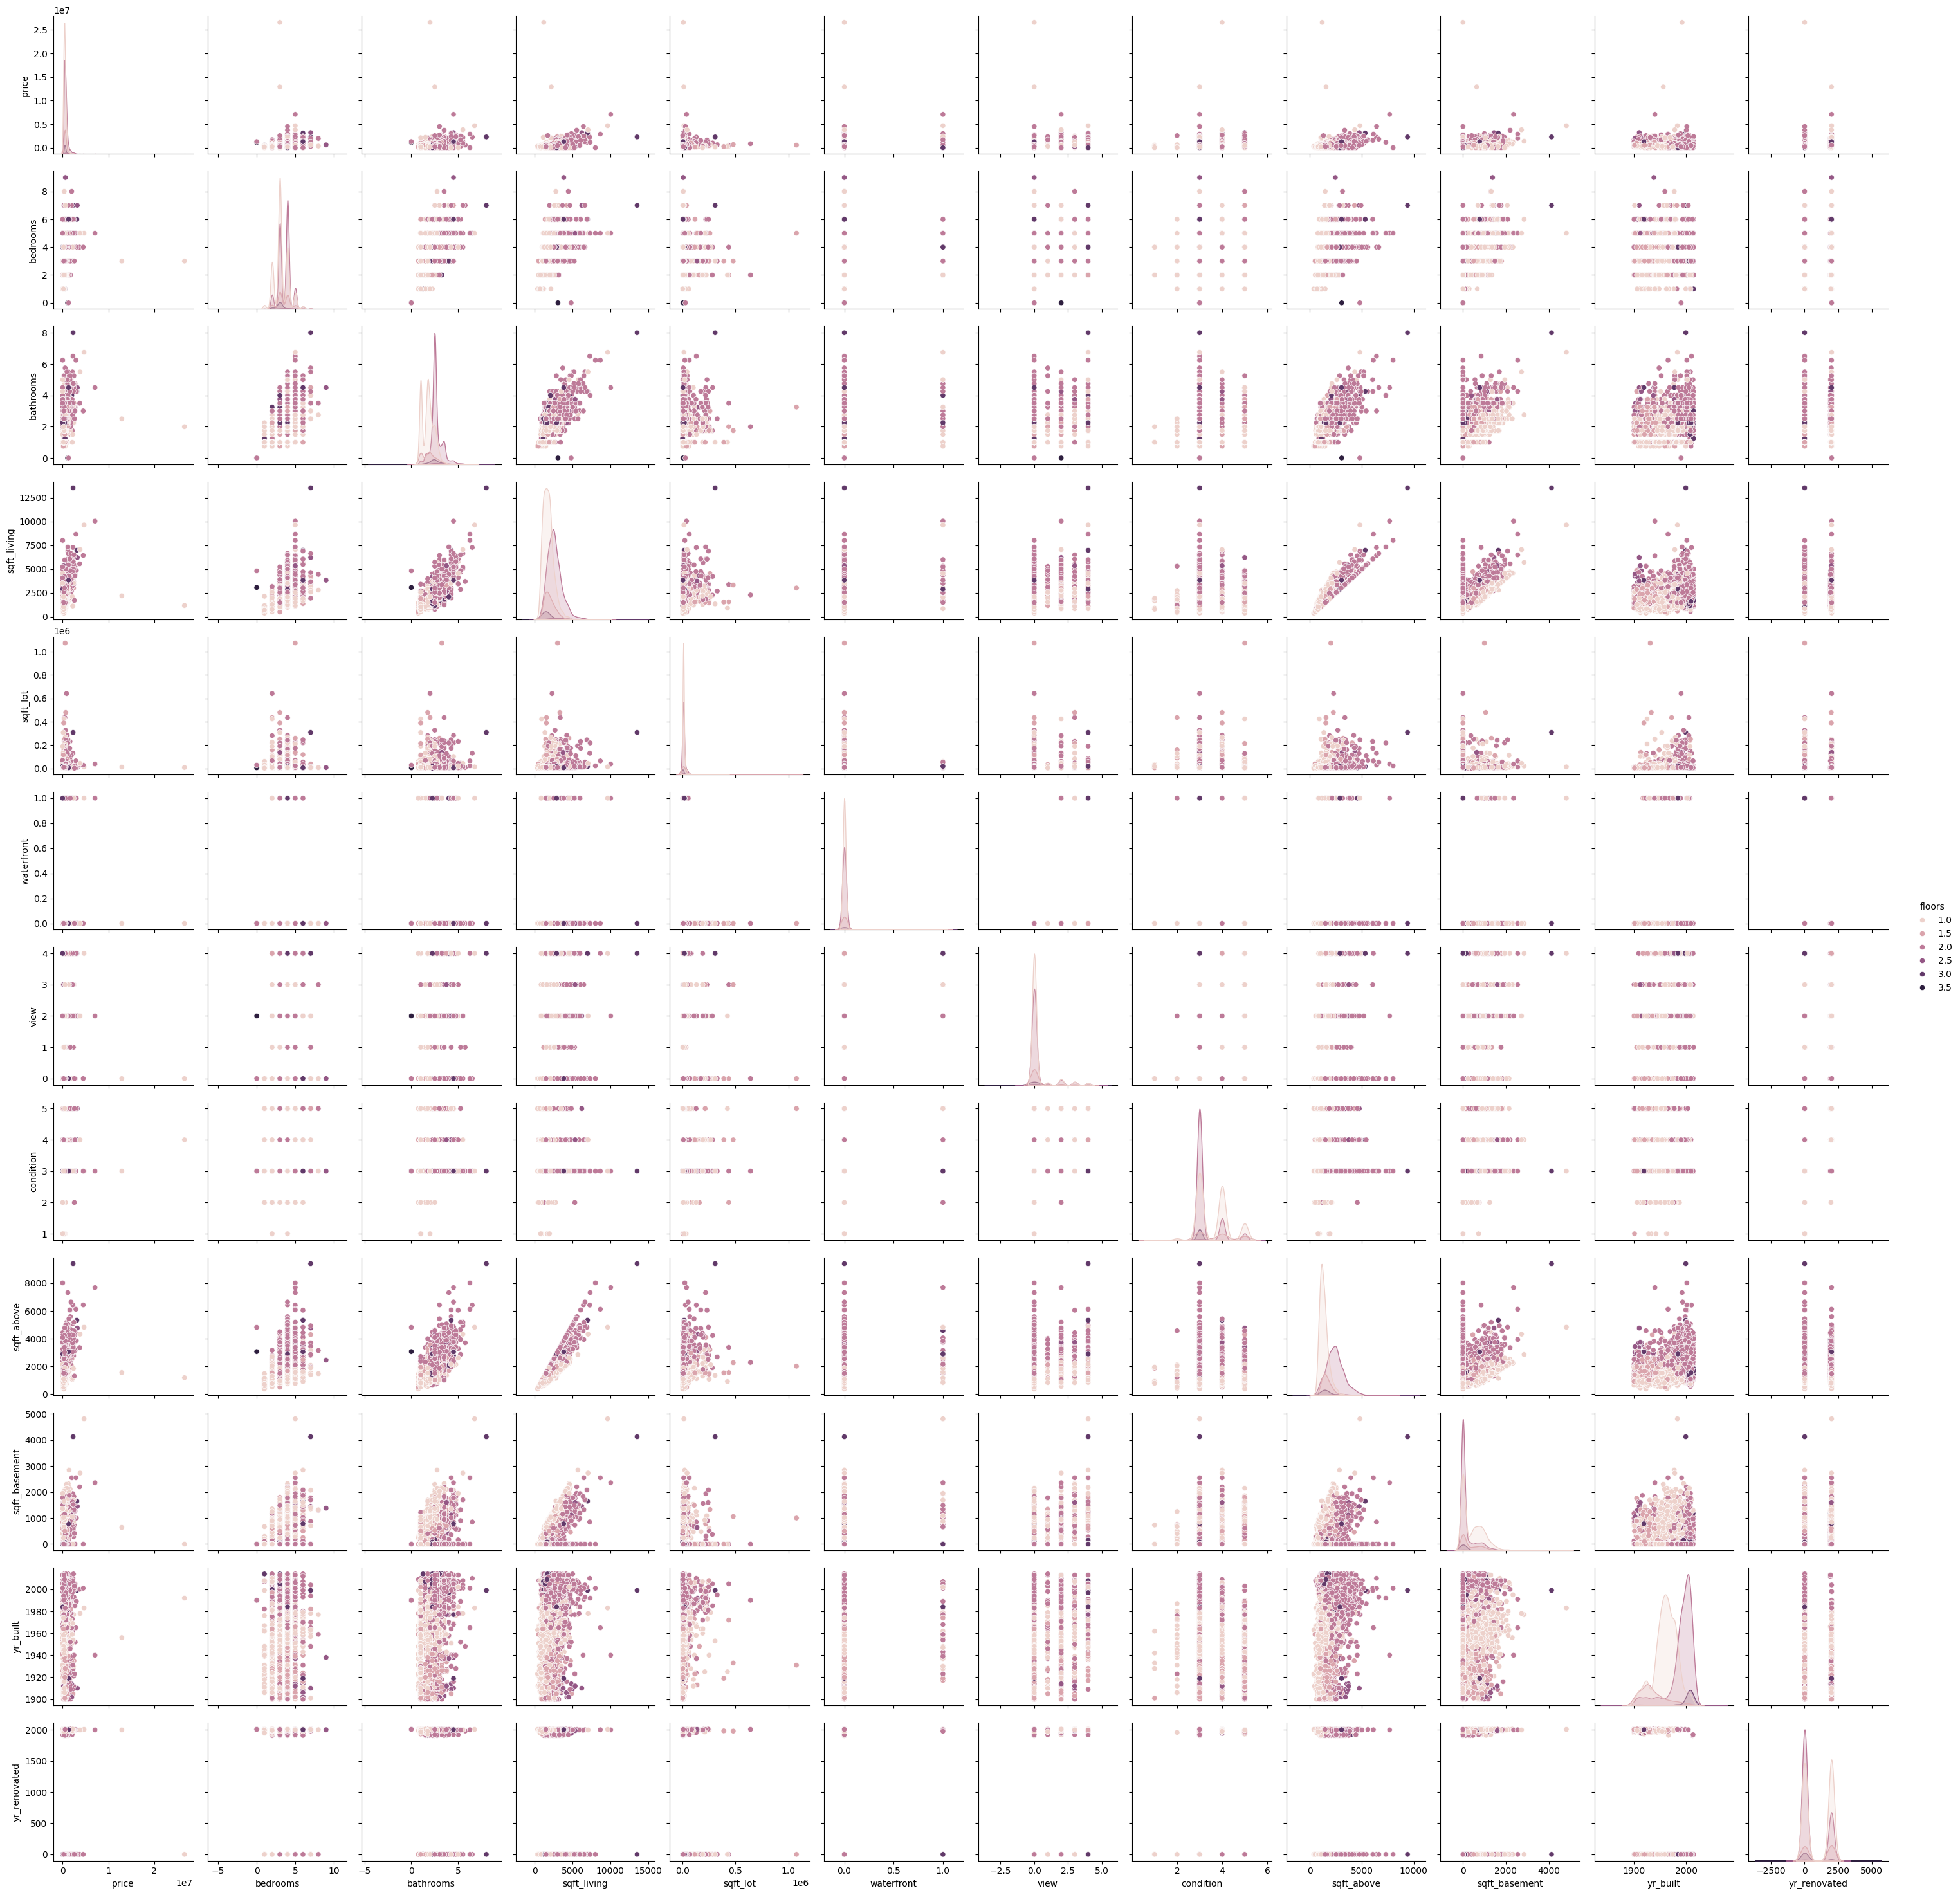

In [57]:
# Annoyingly, bedrooms and floors are cl